# Home-LLC-Assignment

AIM - Build a data science model that explains how  publicly available data for key factors that influence US home prices nationally impacted home prices over the last 20 years.

Approach - The following variables are chosen for the study-

Unemployment Rate
GDP
Income
Construction Prices
Interest Rates
Working Population
subsidy
Home Price Index
New Orders
New Private owned


Data is downloaded from [https://fred.stlouisfed.org/].

A few variables that could have been studied are below.

Net-immigration (It is supposed to have a positive impact. No suitable data could be found)

Marriage Rate (People tend to buy homes after they get married. So, it might have some effect. No data could be found)

Average house size (The data was available only for the years after 2015. Though it is expected that an increase in the average house size would increase prices, it is found that the average home size has been consistently decreasing although the prica has been increasing)

Land availability (Less land, higher prices. Perhaps this is why the prices has been rising even though the average house size has been decreasing. No relevant data could be found)

Location, Urban Population, Percentage of population above 65, Number of Households

 Like abouve Many variables may be used but did not analyse due to their less effectiveness that may create in-efficiency in model prediction.


Following sources were used to gather data -
CASE-SCHILLER Home Price Index - https://fred.stlouisfed.org/series/CSUSHPISA

Interest rates - https://fred.stlouisfed.org/series/FEDFUNDS

Unemployment rate - https://fred.stlouisfed.org/series/UNRATE

Income - https://fred.stlouisfed.org/series/DSPIC96

Per Capita GDP - https://fred.stlouisfed.org/series/A939RX0Q048SBEA

New orders - https://fred.stlouisfed.org/series/COMPUTSA

Construction price  - https://fred.stlouisfed.org/series/WPUSI012011

Housing Subsidies - https://fred.stlouisfed.org/series/L312051A027NBEA

# Analysis
A few factors mentioned as above are not directly related to home price index as an example lets understand like Location is ataken as a factor then we know that in urban area price of land and flat are high while in rural they are less simultaneously this will not impact home price index of whole country as price rising overall is considered not location wise, similar way people age will not affect as there may be possibility that person above is earning more than person of age 35 ,then person of 35 may not be able to contribute in this sector, here income have its direct impact as more the income more will be possibility to invest more in this sector .
also subsidy will have direct impact if govt increase subsidy then there will be boom in sector as more people will invest in purchasing to take benifit of subsidy while if decrease in subsidy by govt then it will impac negatively.thats why here i have taken the direct impact factors and avoided indirect factors to gain efficiency and increase accuracy by decreasing error.

# Important


# Here all features taken for analysis are- interest rates, Unemployment rate, Income, GDP, New orders, Construction price, Subsidies, working_population


# While Target variable is Home Price Index

# Importing essential libraries

In [1]:
import pandas as pd
import numpy as np
import csv

# Data Preparation

In [152]:
interest_rate =pd.read_csv(r'C:\Users\Lenov\OneDrive\Desktop\LLC\FEDFUNDS.csv')

In [170]:

#Changing dtype of date column
interest_rate["DATE"] = pd.to_datetime(interest_rate["DATE"])

#Selecting data post JUNE 2001
mask = interest_rate["DATE"] >= "2001-07-01"
interest_rate = interest_rate[mask]

#Resetting Index
interest_rate.reset_index(inplace = True)
interest_rate.drop(columns = ["index"], inplace = True)

# Creating "Year" and "Month" columns
interest_rate["Year"] = pd.DatetimeIndex(interest_rate["DATE"]).year
interest_rate["Month"] = pd.DatetimeIndex(interest_rate["DATE"]).month
print(interest_rate.shape)
interest_rate

(251, 4)


,DATE,Interest_rate,Year,Month
0,2003-01-01,1.24,2003,1
1,2003-02-01,1.26,2003,2
2,2003-03-01,1.25,2003,3
3,2003-04-01,1.26,2003,4
4,2003-05-01,1.26,2003,5
...,...,...,...,...
246,2023-07-01,5.12,2023,7
247,2023-08-01,5.33,2023,8
248,2023-09-01,5.33,2023,9
249,2023-10-01,5.33,2023,10


In [173]:
#Changing dtype of date column
unemployment_rate["DATE"] = pd.to_datetime(unemployment_rate["DATE"])

#Selecting data post Jan 2003
mask = unemployment_rate["DATE"] >= "2003-01-01"
unemployment_rate = unemployment_rate[mask]

#Resetting Index
unemployment_rate.reset_index(inplace = True)
unemployment_rate.drop(columns = ["index"], inplace = True)

# Creating "Year" and "Month" columns
unemployment_rate["Year"] = pd.DatetimeIndex(unemployment_rate["DATE"]).year
unemployment_rate["Month"] = pd.DatetimeIndex(unemployment_rate["DATE"]).month
print(unemployment_rate.shape)
unemployment_rate

(147, 4)


C:\Users\Lenov\AppData\Local\Temp\ipykernel_13356\1580468491.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unemployment_rate.drop(columns = ["index"], inplace = True)
C:\Users\Lenov\AppData\Local\Temp\ipykernel_13356\1580468491.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unemployment_rate["Year"] = pd.DatetimeIndex(unemployment_rate["DATE"]).year
C:\Users\Lenov\AppData\Local\Temp\ipykernel_13356\1580468491.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

,DATE,unemployment,Year,Month
0,2003-03-01,5.9,2003,3
1,2003-04-01,6.0,2003,4
2,2003-05-01,6.1,2003,5
3,2003-06-01,6.3,2003,6
4,2003-07-01,6.2,2003,7
...,...,...,...,...
142,2023-05-01,3.7,2023,5
143,2023-06-01,3.6,2023,6
144,2023-07-01,3.5,2023,7
145,2023-08-01,3.8,2023,8


In [193]:
unemployment_rate=pd.read_csv(r'C:\Users\Lenov\OneDrive\Desktop\LLC\UNRATE.csv')

In [194]:
#Changing dtype of date column
unemployment_rate["DATE"] = pd.to_datetime(unemployment_rate["DATE"])

#Selecting data post Jan 2003
mask = unemployment_rate["DATE"] >= "2003-01-01"
unemployment_rate = unemployment_rate[mask]

#Resetting Index
unemployment_rate.reset_index(inplace = True)
unemployment_rate.drop(columns = ["index"], inplace = True)


print(unemployment_rate.shape)
unemployment_rate

(251, 2)


,DATE,unemployment
0,2003-01-01,5.8
1,2003-02-01,5.9
2,2003-03-01,5.9
3,2003-04-01,6.0
4,2003-05-01,6.1
...,...,...
246,2023-07-01,3.5
247,2023-08-01,3.8
248,2023-09-01,3.8
249,2023-10-01,3.9


In [195]:
income =pd.read_csv(r'C:\Users\Lenov\OneDrive\Desktop\LLC\income.csv')

In [196]:
#Changing dtype of date column
income["DATE"] = pd.to_datetime(income["DATE"])

#Selecting data post Jan 2003
mask = income["DATE"] >= "2003-01-01"
income = income[mask]

#Resetting Index
income.reset_index(inplace = True)
income.drop(columns = ["index"], inplace = True)

print(income.shape)
income

(250, 2)


,DATE,income
0,2003-01-01,10710.4
1,2003-02-01,10674.0
2,2003-03-01,10696.5
3,2003-04-01,10752.7
4,2003-05-01,10832.0
...,...,...
245,2023-06-01,16809.5
246,2023-07-01,16796.9
247,2023-08-01,16799.7
248,2023-09-01,16804.8


In [197]:
construction_price =pd.read_csv(r'C:\Users\Lenov\OneDrive\Desktop\LLC\construction_price.csv')

In [198]:
#Changing dtype of date column
construction_price["DATE"] = pd.to_datetime(construction_price["DATE"])

#Selecting data post Jan 2003
mask = construction_price["DATE"] >= "2003-01-01"
construction_price = construction_price[mask]

#Resetting Index
construction_price.reset_index(inplace = True)
construction_price.drop(columns = ["index"], inplace = True)

print(construction_price.shape)
construction_price

(250, 2)


,DATE,construction_price
0,2003-01-01,144.400
1,2003-02-01,145.200
2,2003-03-01,145.200
3,2003-04-01,145.900
4,2003-05-01,145.800
...,...,...
245,2023-06-01,337.336
246,2023-07-01,334.576
247,2023-08-01,333.980
248,2023-09-01,332.224


In [60]:
#Changing dtype of date column
construction_price["DATE"] = pd.to_datetime(construction_price["DATE"])

#Selecting data post Jan 2003
mask = construction_price["DATE"] >= "2003-01-01"
construction_price = construction_price[mask]

#Resetting Index
construction_price.reset_index(inplace = True)
construction_price.drop(columns = ["index"], inplace = True)


print(construction_price.shape)
construction_price

(244, 2)


,DATE,WPUSI012011
917,2023-06-01,337.336
918,2023-07-01,334.576
919,2023-08-01,333.980
920,2023-09-01,332.224
921,2023-10-01,329.690


In [201]:
g_d_p =pd.read_csv(r'C:\Users\Lenov\OneDrive\Desktop\LLC\A939RX0Q048SBEA.csv')

In [202]:
#Changing dtype of date column
g_d_p["DATE"] = pd.to_datetime(g_d_p["DATE"])

#Selecting data post Jan 2003
mask = g_d_p["DATE"] >= "2003-01-01"
g_d_p = g_d_p[mask]

#Resetting Index
g_d_p.reset_index(inplace = True)
g_d_p.drop(columns = ["index"], inplace = True)


print(g_d_p.shape)
g_d_p

(83, 2)


,DATE,g_d_p
0,2003-01-01,50462
1,2003-04-01,50796
2,2003-07-01,51512
3,2003-10-01,51986
4,2004-01-01,52179
...,...,...
78,2022-07-01,65462
79,2022-10-01,65783
80,2023-01-01,66078
81,2023-04-01,66341


In [204]:
govt_subsidy =pd.read_csv(r'C:\Users\Lenov\OneDrive\Desktop\LLC\govt_subsidy.csv')

In [205]:
#Changing dtype of date column
govt_subsidy["DATE"] = pd.to_datetime(govt_subsidy["DATE"])

#Selecting data post Jan 2003
mask = govt_subsidy["DATE"] >= "2003-01-01"
govt_subsidy = govt_subsidy[mask]

#Resetting Index
govt_subsidy.reset_index(inplace = True)
govt_subsidy.drop(columns = ["index"], inplace = True)


print(govt_subsidy.shape)
govt_subsidy

(20, 2)


,DATE,govt_subsidy
0,2003-01-01,25.930
1,2004-01-01,27.201
2,2005-01-01,27.651
3,2006-01-01,28.604
4,2007-01-01,29.512
5,2008-01-01,29.876
6,2009-01-01,32.883
7,2010-01-01,32.669
8,2011-01-01,34.230
9,2012-01-01,33.283


In [206]:
new_private_owned =pd.read_csv(r'C:\Users\Lenov\OneDrive\Desktop\LLC\COMPUTSA.csv')

In [207]:
#Changing dtype of date column
new_private_owned["DATE"] = pd.to_datetime(new_private_owned["DATE"])

#Selecting data post Jan 2003
mask = new_private_owned["DATE"] >= "2003-01-01"
new_private_owned = new_private_owned[mask]

#Resetting Index
new_private_owned.reset_index(inplace = True)
new_private_owned.drop(columns = ["index"], inplace = True)


print(new_private_owned.shape)
new_private_owned

(250, 2)


,DATE,new_private_owned
0,2003-01-01,1654
1,2003-02-01,1688
2,2003-03-01,1638
3,2003-04-01,1662
4,2003-05-01,1733
...,...,...
245,2023-06-01,1492
246,2023-07-01,1334
247,2023-08-01,1370
248,2023-09-01,1478


In [208]:
home_price_index =pd.read_csv(r'C:\Users\Lenov\OneDrive\Desktop\LLC\CSUSHPISA.csv')

In [209]:
#Changing dtype of date column
home_price_index["DATE"] = pd.to_datetime(home_price_index["DATE"])

#Selecting data post Jan 2003
mask = home_price_index["DATE"] >= "2003-01-01"
home_price_index = home_price_index[mask]

#Resetting Index
home_price_index.reset_index(inplace = True)
home_price_index.drop(columns = ["index"], inplace = True)


print(home_price_index.shape)
home_price_index

(249, 2)


,DATE,home_price_index
0,2003-01-01,128.461
1,2003-02-01,129.355
2,2003-03-01,130.148
3,2003-04-01,130.884
4,2003-05-01,131.735
...,...,...
244,2023-05-01,302.566
245,2023-06-01,304.593
246,2023-07-01,306.767
247,2023-08-01,309.155


In [210]:
new_orders =pd.read_csv(r'C:\Users\Lenov\OneDrive\Desktop\LLC\ACMSNO.csv')

In [211]:
#Changing dtype of date column
new_orders["DATE"] = pd.to_datetime(new_orders["DATE"])

#Selecting data post Jan 2003
mask = new_orders["DATE"] >= "2003-01-01"
new_orders = new_orders[mask]

#Resetting Index
new_orders.reset_index(inplace = True)
new_orders.drop(columns = ["index"], inplace = True)

print(new_orders.shape)
new_orders

(250, 2)


,DATE,new_orders
0,2003-01-01,34445
1,2003-02-01,37045
2,2003-03-01,35329
3,2003-04-01,34221
4,2003-05-01,34676
...,...,...
245,2023-06-01,62265
246,2023-07-01,62187
247,2023-08-01,62652
248,2023-09-01,62955


In [191]:
working_population =pd.read_csv(r'C:\Users\Lenov\OneDrive\Desktop\LLC\LFWA64TTUSM647S.csv')

In [192]:
#Changing dtype of date column
working_population["DATE"] = pd.to_datetime(working_population["DATE"])

#Selecting data post Jan 2003
mask = working_population["DATE"] >= "2003-01-01"
working_population = working_population[mask]

#Resetting Index
working_population.reset_index(inplace = True)
working_population.drop(columns = ["index"], inplace = True)


print(working_population.shape)
working_population

(250, 2)


,DATE,working_population
0,2003-01-01,185635346.4
1,2003-02-01,185869692.3
2,2003-03-01,186085118.2
3,2003-04-01,186470754.0
4,2003-05-01,186649078.0
...,...,...
245,2023-06-01,208706920.0
246,2023-07-01,208779237.3
247,2023-08-01,208906586.8
248,2023-09-01,209117169.8


In [217]:
# Merging Per Capita GDP (Quarterly data)
g_d_p["DATE"] = pd.to_datetime(g_d_p["DATE"])
home_price_index = pd.merge(home_price_index,g_d_p, how = "left")
df.head()

,Interest_rate,Year,Month,unemployment,working_population,new_orders,new_private_owned,income,g_d_p,home_price_index
DATE,,,,,,,,,,
2003-01-01,1.24,2003.0,1.0,5.8,185635346.4,34445.0,1654.0,10710.4,50462.0,128.461
2003-02-01,1.26,2003.0,2.0,5.9,185869692.3,37045.0,1688.0,10674.0,NaN,129.355
2003-03-01,1.25,2003.0,3.0,5.9,186085118.2,35329.0,1638.0,10696.5,NaN,130.148
2003-04-01,1.26,2003.0,4.0,6.0,186470754.0,34221.0,1662.0,10752.7,50796.0,130.884
2003-05-01,1.26,2003.0,5.0,6.1,186649078.0,34676.0,1733.0,10832.0,NaN,131.735


# Creating DataFrame

In [214]:
df = pd.DataFrame()
df_bymonth = [interest_rate_f, unemployment_rate, working_population, new_orders, new_private_owned, income,g_d_p, home_price_index,]
for df1 in df_bymonth:
    df1["DATE"] = pd.to_datetime(df1["DATE"])
    df1 = df1.set_index("DATE")
    df = pd.concat([df,df1], axis = 1)
print(df.shape)
df.tail(10)

(251, 10)


C:\Users\Lenov\AppData\Local\Temp\ipykernel_13356\1589226817.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["DATE"] = pd.to_datetime(df1["DATE"])


,Interest_rate,Year,Month,unemployment,working_population,new_orders,new_private_owned,income,g_d_p,home_price_index
DATE,,,,,,,,,,
2023-02-01,4.57,2023.0,2.0,3.6,208253373.2,61886.0,1577.0,16656.1,NaN,297.537
2023-03-01,4.65,2023.0,3.0,3.5,208290967.2,61929.0,1528.0,16730.2,NaN,298.637
2023-04-01,4.83,2023.0,4.0,3.4,208392885.8,61353.0,1416.0,16763.9,66341.0,300.213
2023-05-01,5.06,2023.0,5.0,3.7,208612844.2,62057.0,1534.0,16818.5,NaN,302.566
2023-06-01,5.08,2023.0,6.0,3.6,208706920.0,62265.0,1492.0,16809.5,NaN,304.593
2023-07-01,5.12,2023.0,7.0,3.5,208779237.3,62187.0,1334.0,16796.9,67083.0,306.767
2023-08-01,5.33,2023.0,8.0,3.8,208906586.8,62652.0,1370.0,16799.7,NaN,309.155
2023-09-01,5.33,2023.0,9.0,3.8,209117169.8,62955.0,1478.0,16804.8,NaN,311.175
2023-10-01,5.33,2023.0,10.0,3.9,209039442.2,62880.0,1410.0,16848.7,NaN,NaN


Dataframe of all variables are created here by combining all by their dates

In [216]:
df

,Interest_rate,Year,Month,unemployment,working_population,new_orders,new_private_owned,income,g_d_p,home_price_index
DATE,,,,,,,,,,
2003-01-01,1.24,2003.0,1.0,5.8,185635346.4,34445.0,1654.0,10710.4,50462.0,128.461
2003-02-01,1.26,2003.0,2.0,5.9,185869692.3,37045.0,1688.0,10674.0,NaN,129.355
2003-03-01,1.25,2003.0,3.0,5.9,186085118.2,35329.0,1638.0,10696.5,NaN,130.148
2003-04-01,1.26,2003.0,4.0,6.0,186470754.0,34221.0,1662.0,10752.7,50796.0,130.884
2003-05-01,1.26,2003.0,5.0,6.1,186649078.0,34676.0,1733.0,10832.0,NaN,131.735
...,...,...,...,...,...,...,...,...,...,...
2023-07-01,5.12,2023.0,7.0,3.5,208779237.3,62187.0,1334.0,16796.9,67083.0,306.767
2023-08-01,5.33,2023.0,8.0,3.8,208906586.8,62652.0,1370.0,16799.7,NaN,309.155
2023-09-01,5.33,2023.0,9.0,3.8,209117169.8,62955.0,1478.0,16804.8,NaN,311.175


In [226]:
df.shape

(251, 10)

# Gives informaton of the dataset it's type etc

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2003-01-01 to 2023-11-01
Freq: MS
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Interest_rate       250 non-null    float64
 1   Year                250 non-null    float64
 2   Month               250 non-null    float64
 3   unemployment        251 non-null    float64
 4   working_population  250 non-null    float64
 5   new_orders          250 non-null    float64
 6   new_private_owned   250 non-null    float64
 7   income              250 non-null    float64
 8   g_d_p               83 non-null     float64
 9   home_price_index    249 non-null    float64
dtypes: float64(10)
memory usage: 21.6 KB


Note: There are only 1 data types in the data but there may to possibility to typecast (if required in future steps)

object: Object format means variables are categorical. Categorical variables in our dataset are: Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status

int64: It represents the integer variables. ApplicantIncome is of this format.

float64: It represents the variable which have some decimal values involved. They are also numerical variables. Numerical variables in our dataset are: CoapplicantIncome, LoanAmount, Loan_Amount_Term, and Credit_History

Why Data Types are important?

Datatypes are an important concept because statistical methods can only be used with certain data types. You have to analyze continuous data differently than categorical data otherwise it would result in a wrong analysis. Therefore knowing the types of data you are dealing with, enables you to choose the correct method of anal

# Checking Null values

In [228]:
df.isna().sum()

Interest_rate           1
Year                    1
Month                   1
unemployment            0
working_population      1
new_orders              1
new_private_owned       1
income                  1
g_d_p                 168
home_price_index        2
dtype: int64

In [229]:
# Filling missing values in the Per_Capita_GDP column using linear interpolation
df["g_d_p"] = df["g_d_p"].interpolate()

In [230]:
df.isna().sum()

Interest_rate         1
Year                  1
Month                 1
unemployment          0
working_population    1
new_orders            1
new_private_owned     1
income                1
g_d_p                 0
home_price_index      2
dtype: int64

In [231]:
df.dropna(inplace = True)

In [232]:
df.isna().sum()

Interest_rate         0
Year                  0
Month                 0
unemployment          0
working_population    0
new_orders            0
new_private_owned     0
income                0
g_d_p                 0
home_price_index      0
dtype: int64

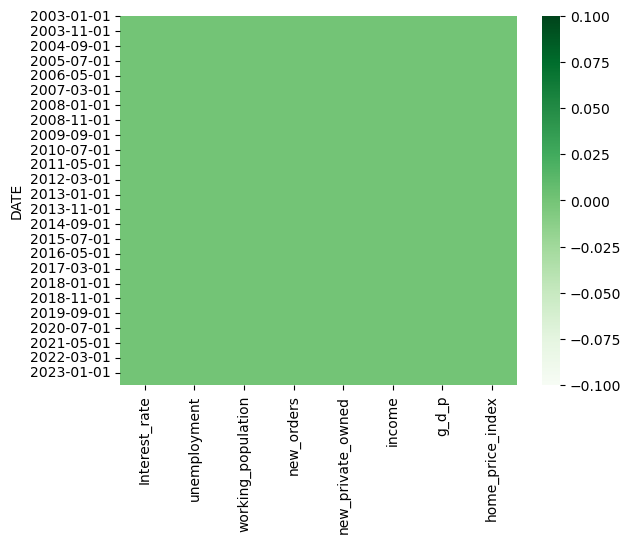

In [241]:
sns.heatmap(df.isnull(), cmap="Greens")
plt.show()

In [233]:
df.shape

(249, 10)

# Created CSV for Dataset

In [234]:
df.to_csv("final_dataset.csv")

In [235]:
df = pd.read_csv("final_dataset.csv").set_index("DATE")
df.head(10)

,Interest_rate,Year,Month,unemployment,working_population,new_orders,new_private_owned,income,g_d_p,home_price_index
DATE,,,,,,,,,,
2003-01-01,1.24,2003.0,1.0,5.8,185635346.4,34445.0,1654.0,10710.4,50462.000000,128.461
2003-02-01,1.26,2003.0,2.0,5.9,185869692.3,37045.0,1688.0,10674.0,50573.333333,129.355
2003-03-01,1.25,2003.0,3.0,5.9,186085118.2,35329.0,1638.0,10696.5,50684.666667,130.148
2003-04-01,1.26,2003.0,4.0,6.0,186470754.0,34221.0,1662.0,10752.7,50796.000000,130.884
2003-05-01,1.26,2003.0,5.0,6.1,186649078.0,34676.0,1733.0,10832.0,51034.666667,131.735
2003-06-01,1.22,2003.0,6.0,6.3,186800679.6,35316.0,1641.0,10860.6,51273.333333,132.649
2003-07-01,1.01,2003.0,7.0,6.2,187066500.3,36024.0,1680.0,10991.1,51512.000000,133.777
2003-08-01,1.03,2003.0,8.0,6.1,187304009.5,36004.0,1570.0,11066.7,51670.000000,134.969
2003-09-01,1.01,2003.0,9.0,6.1,187538981.3,36853.0,1719.0,10940.8,51828.000000,136.294


# Importing essential libraries

In [240]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [237]:
# Dropping year and month columns
df.drop(columns = ["Year", "Month"], inplace = True)

In [238]:
df

,Interest_rate,unemployment,working_population,new_orders,new_private_owned,income,g_d_p,home_price_index
DATE,,,,,,,,
2003-01-01,1.24,5.8,185635346.4,34445.0,1654.0,10710.4,50462.000000,128.461
2003-02-01,1.26,5.9,185869692.3,37045.0,1688.0,10674.0,50573.333333,129.355
2003-03-01,1.25,5.9,186085118.2,35329.0,1638.0,10696.5,50684.666667,130.148
2003-04-01,1.26,6.0,186470754.0,34221.0,1662.0,10752.7,50796.000000,130.884
2003-05-01,1.26,6.1,186649078.0,34676.0,1733.0,10832.0,51034.666667,131.735
...,...,...,...,...,...,...,...,...
2023-05-01,5.06,3.7,208612844.2,62057.0,1534.0,16818.5,66588.333333,302.566
2023-06-01,5.08,3.6,208706920.0,62265.0,1492.0,16809.5,66835.666667,304.593
2023-07-01,5.12,3.5,208779237.3,62187.0,1334.0,16796.9,67083.000000,306.767


# Pairplot

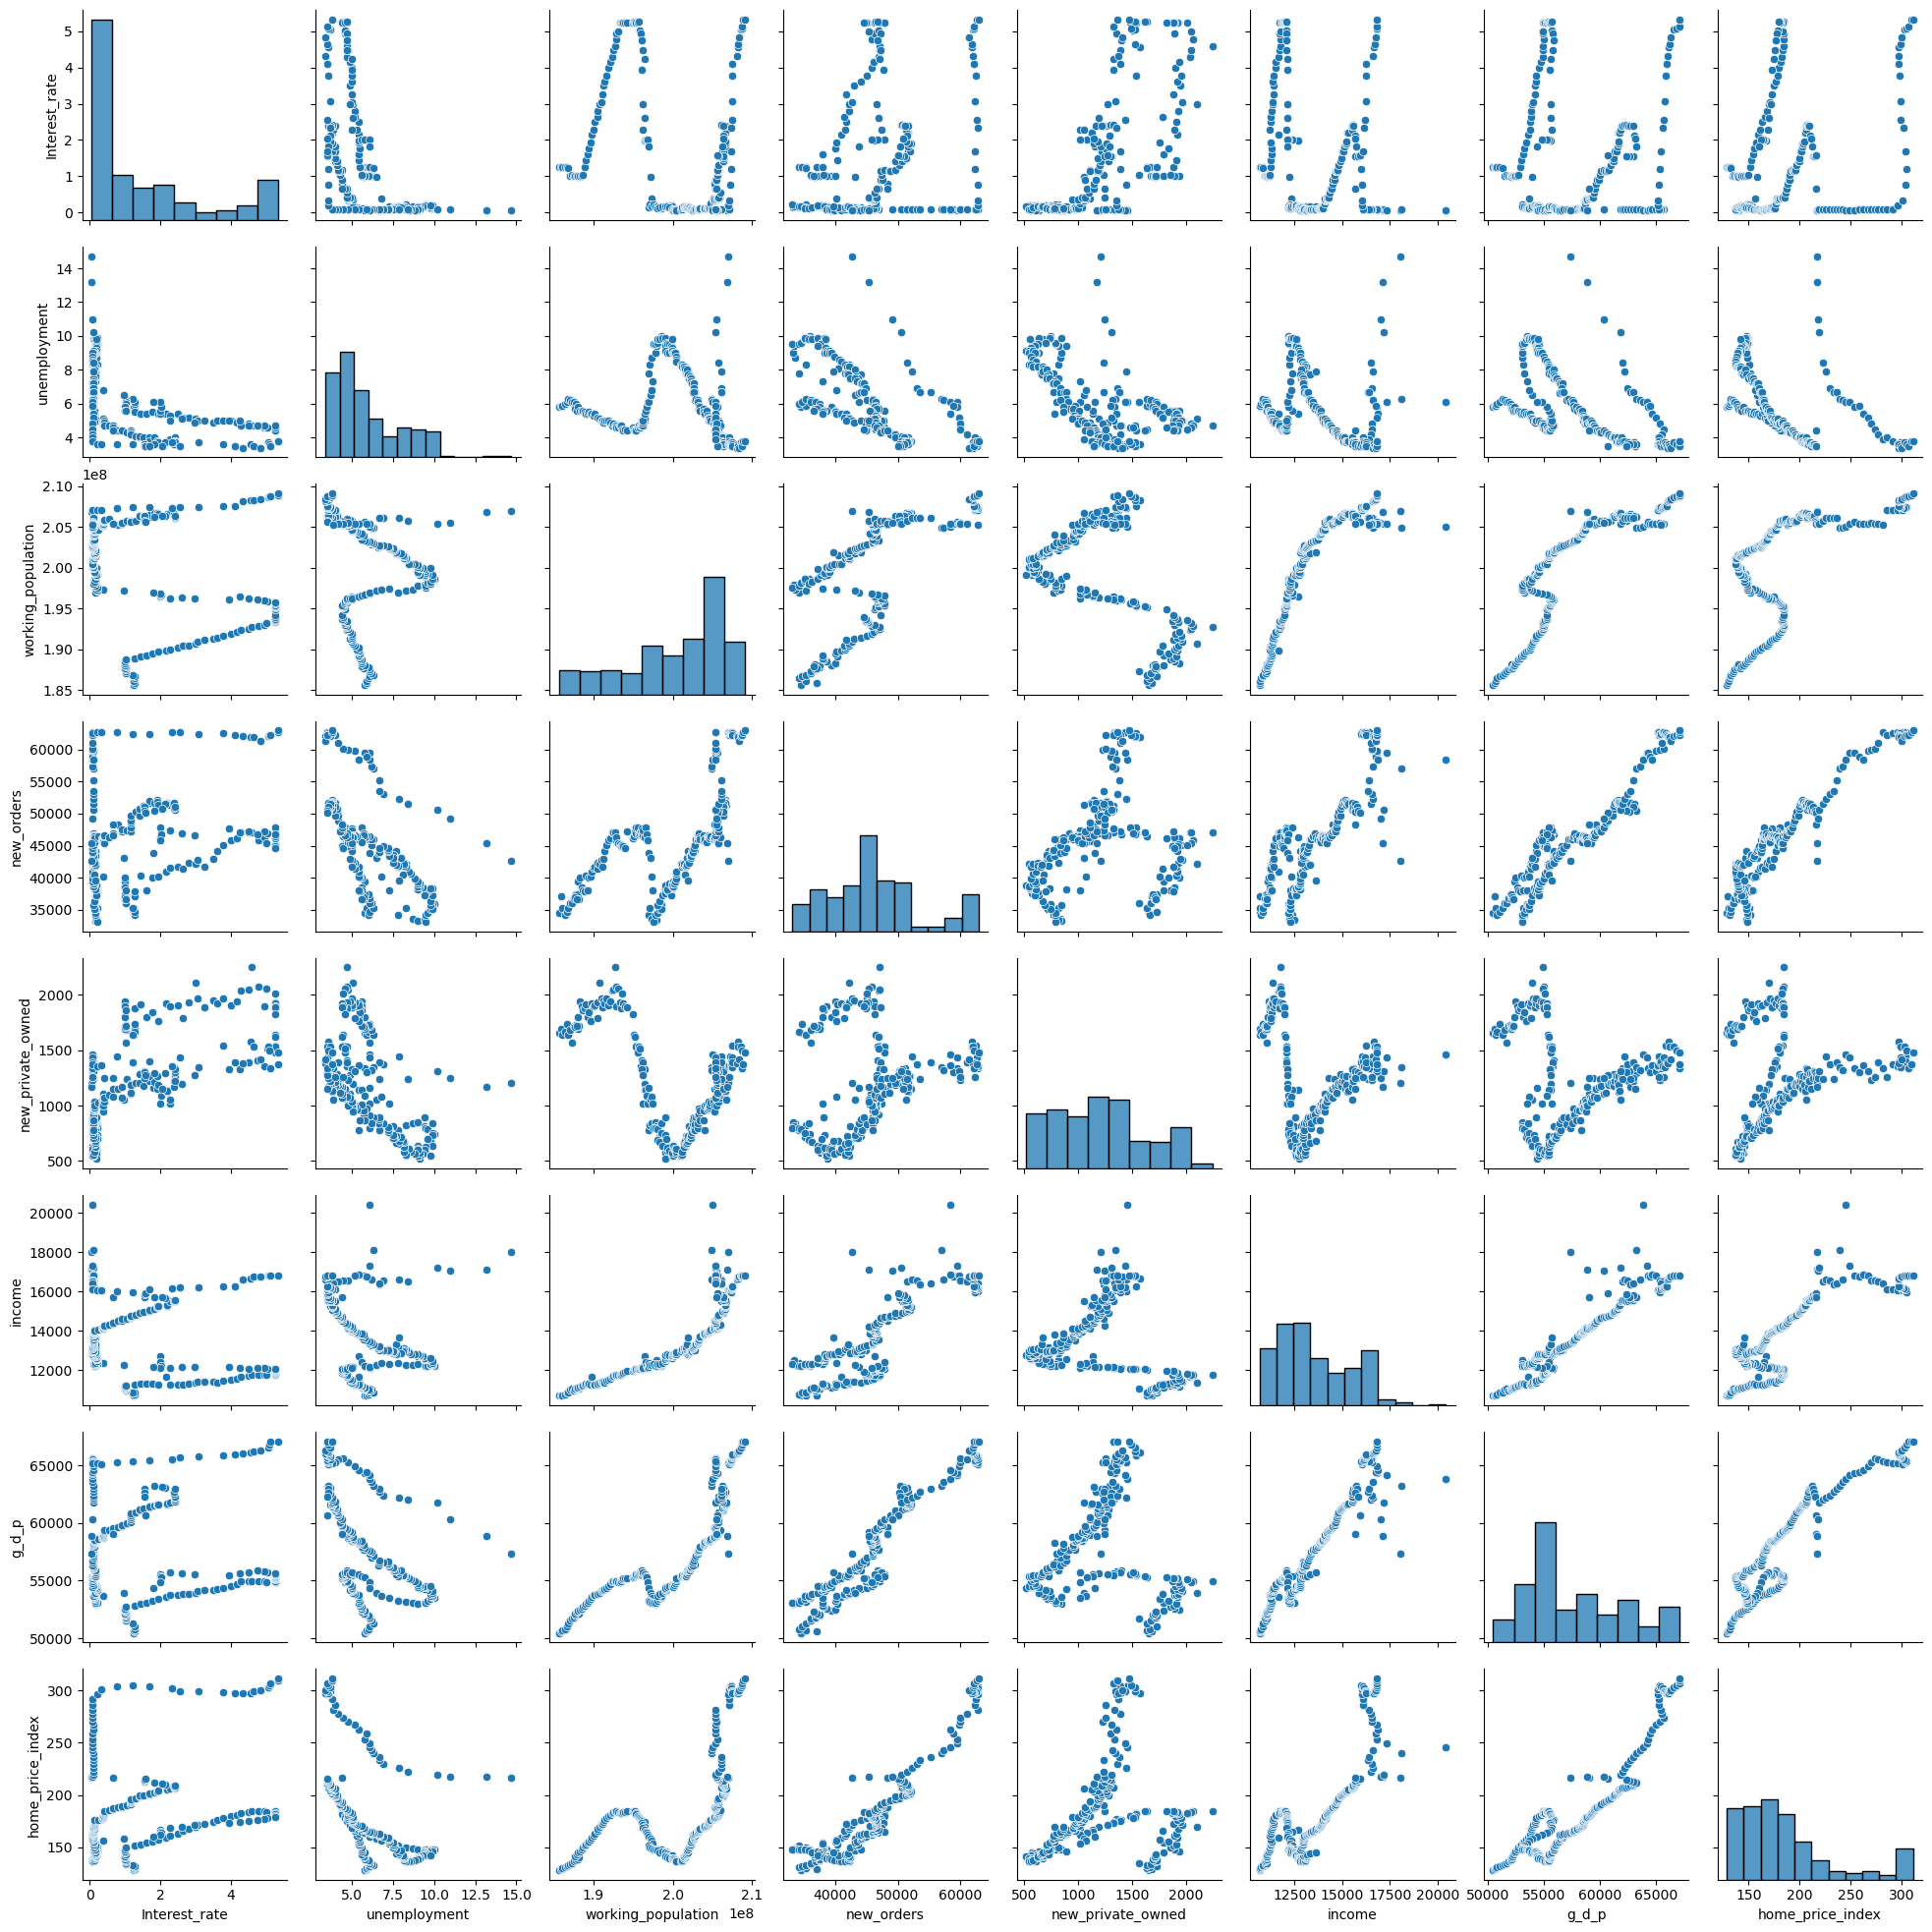

In [242]:
sns.pairplot(df)

# Checking Correlation

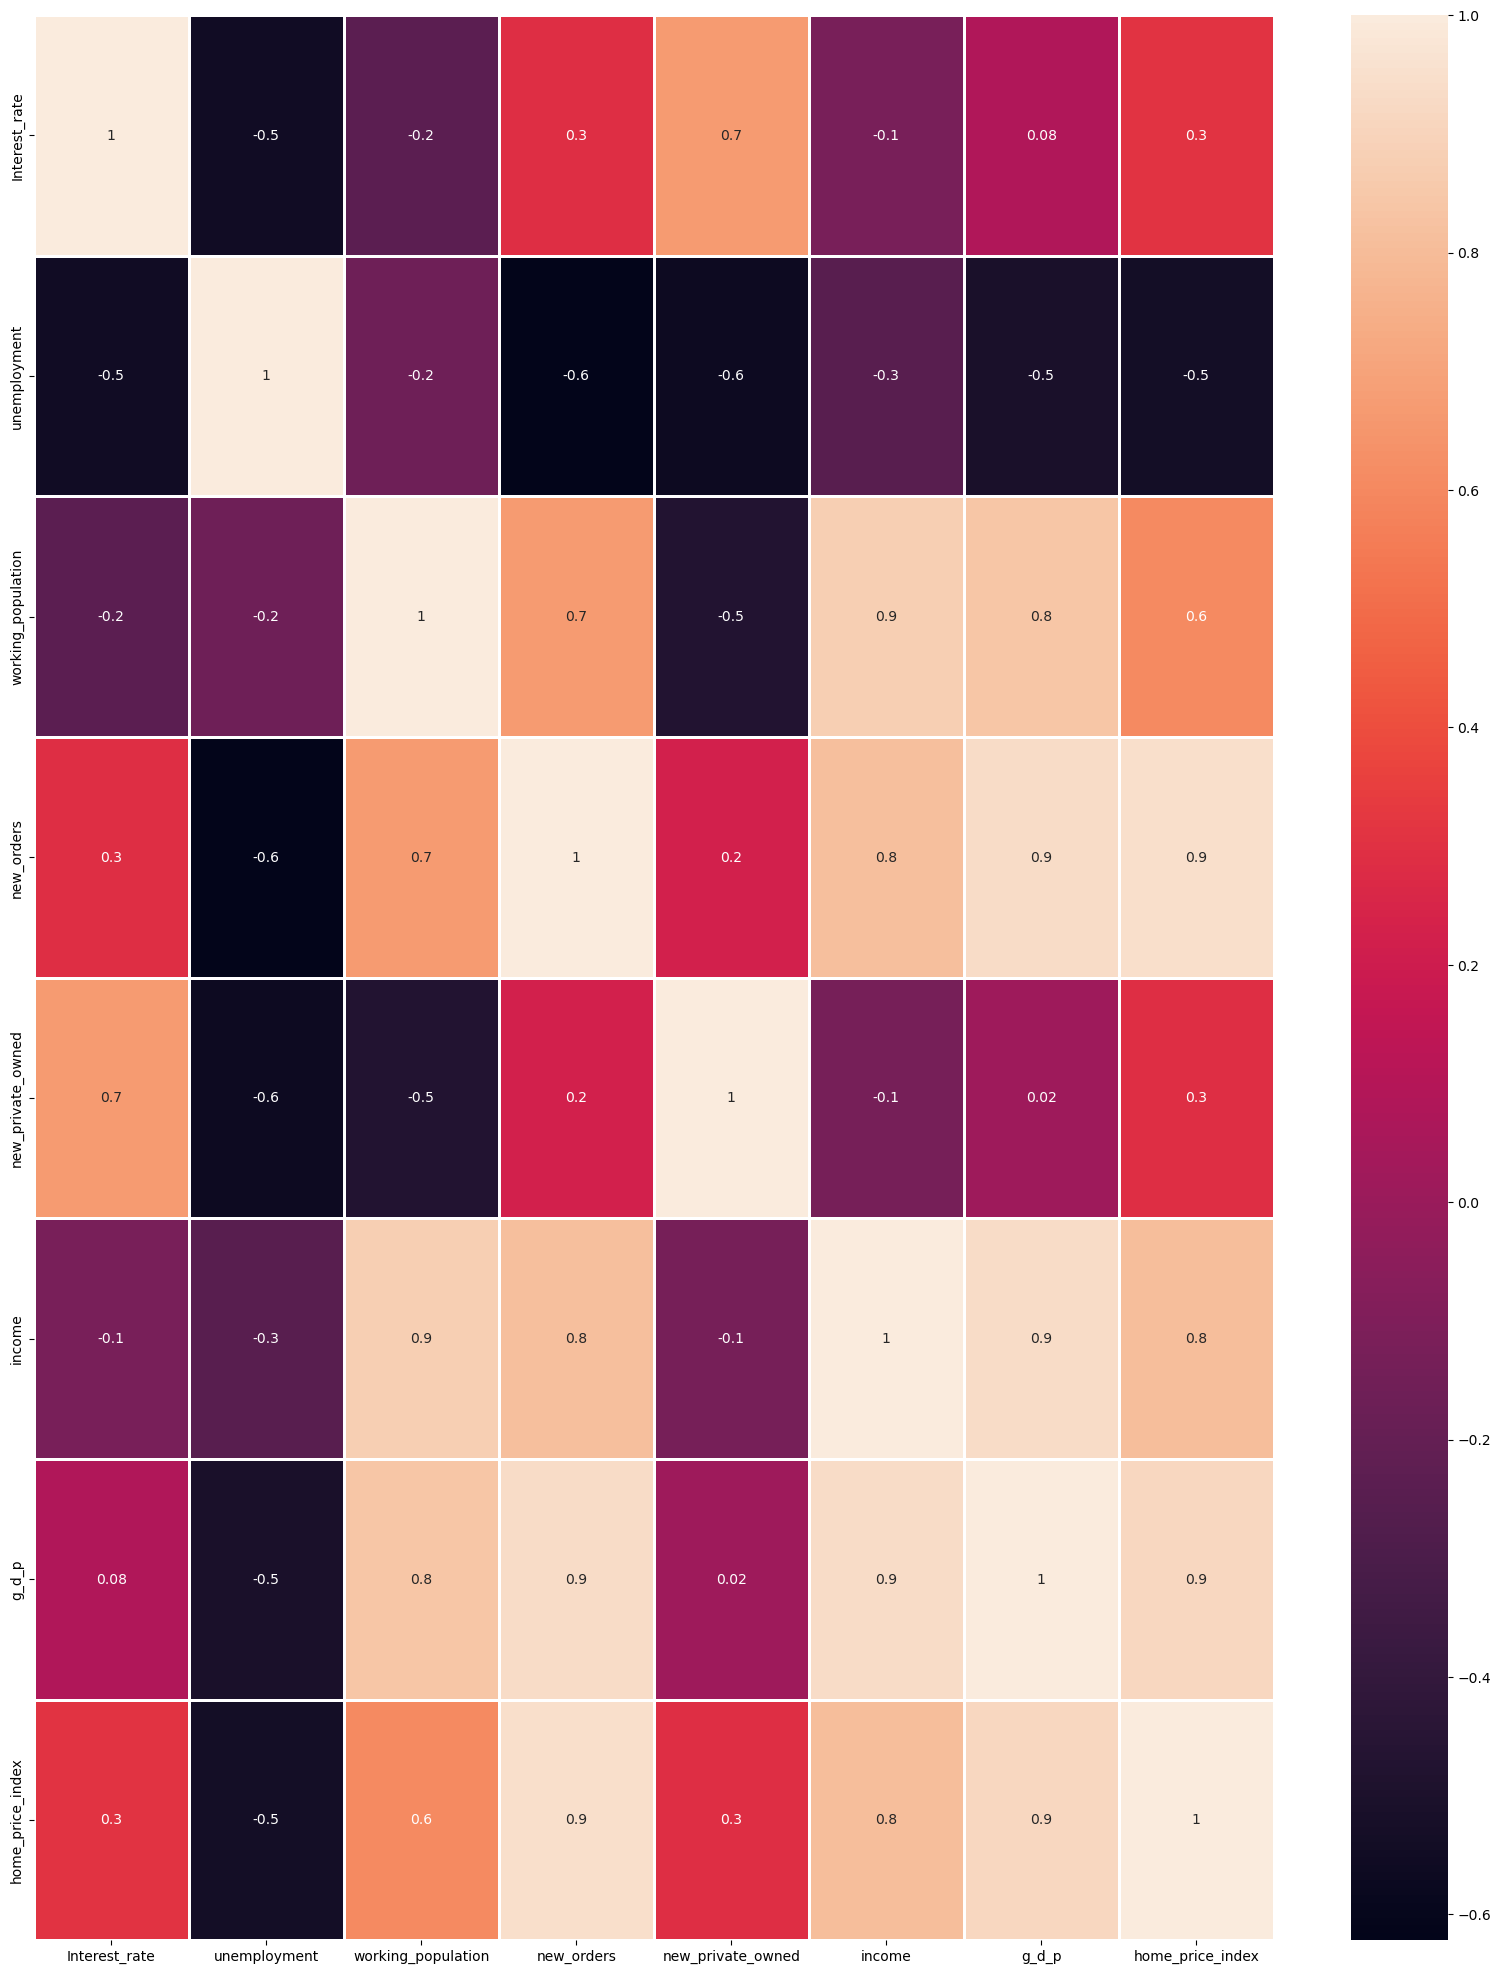

In [243]:
plt.figure(figsize=(20,25))
corr = df.corr()
sns.heatmap(data=corr, annot=True, fmt='.1g' ,linewidth= 2)
plt.show()

Here home price index and gdp are more correlated to new orders (we may analyse by seeing in above heat map whose value are indicated more than 0.8 are highly correlated) that may create Overfitting and reduced efficiency in future ,so lets check them seperately by going through its statistics and plot if found more corelated then that feature may be removed to avoid the above mentioned problem

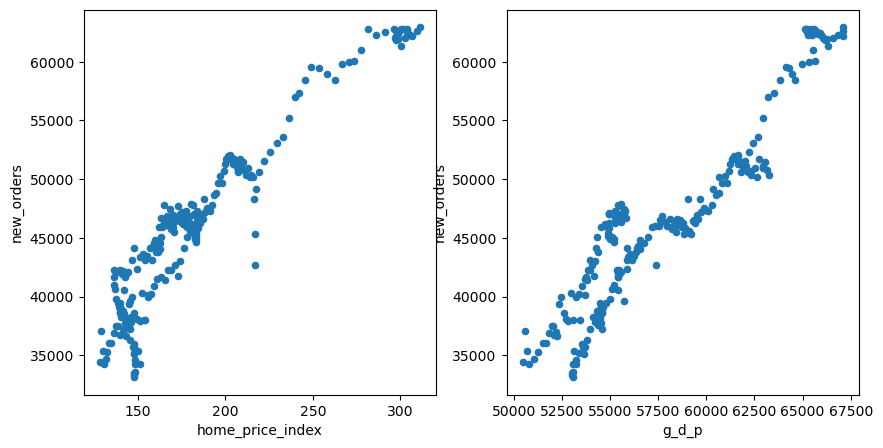

In [251]:
fig ,axs =plt.subplots(1,2)
df.plot(kind='scatter',x='home_price_index',y='new_orders', ax=axs[0] ,figsize=(10,5))
df.plot(kind='scatter',x='g_d_p',y='new_orders', ax=axs[1] ,figsize=(10,5))
fig.savefig('testdata.jpg')

from above it is concluded that HPI and GDP are Correlated to new orders but still a few more things is to be checked before dropping any feature as dropping any feature will create data loss so lets check correlation between GDP and HPI and aslo between GDP and income to get fully satisfied and lets have a close watch.

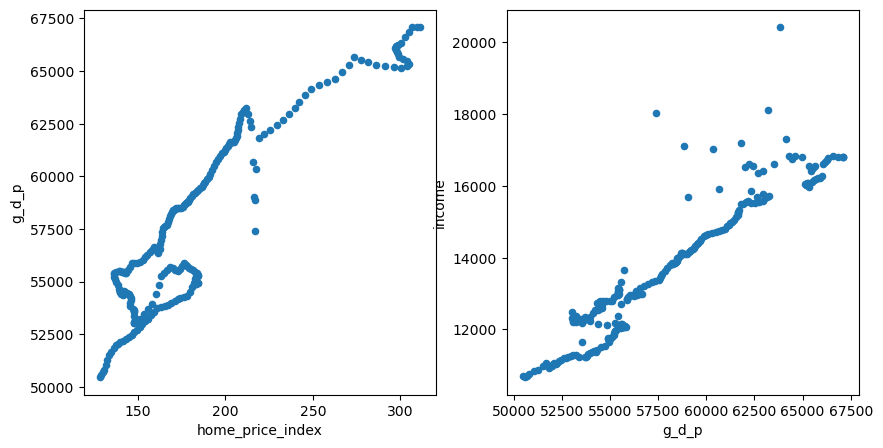

In [252]:
fig ,axs =plt.subplots(1,2)
df.plot(kind='scatter',x='home_price_index',y='g_d_p', ax=axs[0] ,figsize=(10,5))
df.plot(kind='scatter',x='g_d_p',y='income', ax=axs[1] ,figsize=(10,5))
fig.savefig('testdata.jpg')

now its clear from above analysis that the only factor that may be removed to avoid in efficiency is new orders ,other factors will not affect much(no doubt there is still a few factors with high correlation). so lets drop new order. also in matter of real estatate new order will depend on other factors so it directly do not create any impact on rising point of HPI in country

In [253]:
df.drop(['new_orders'],axis=1,inplace=True)

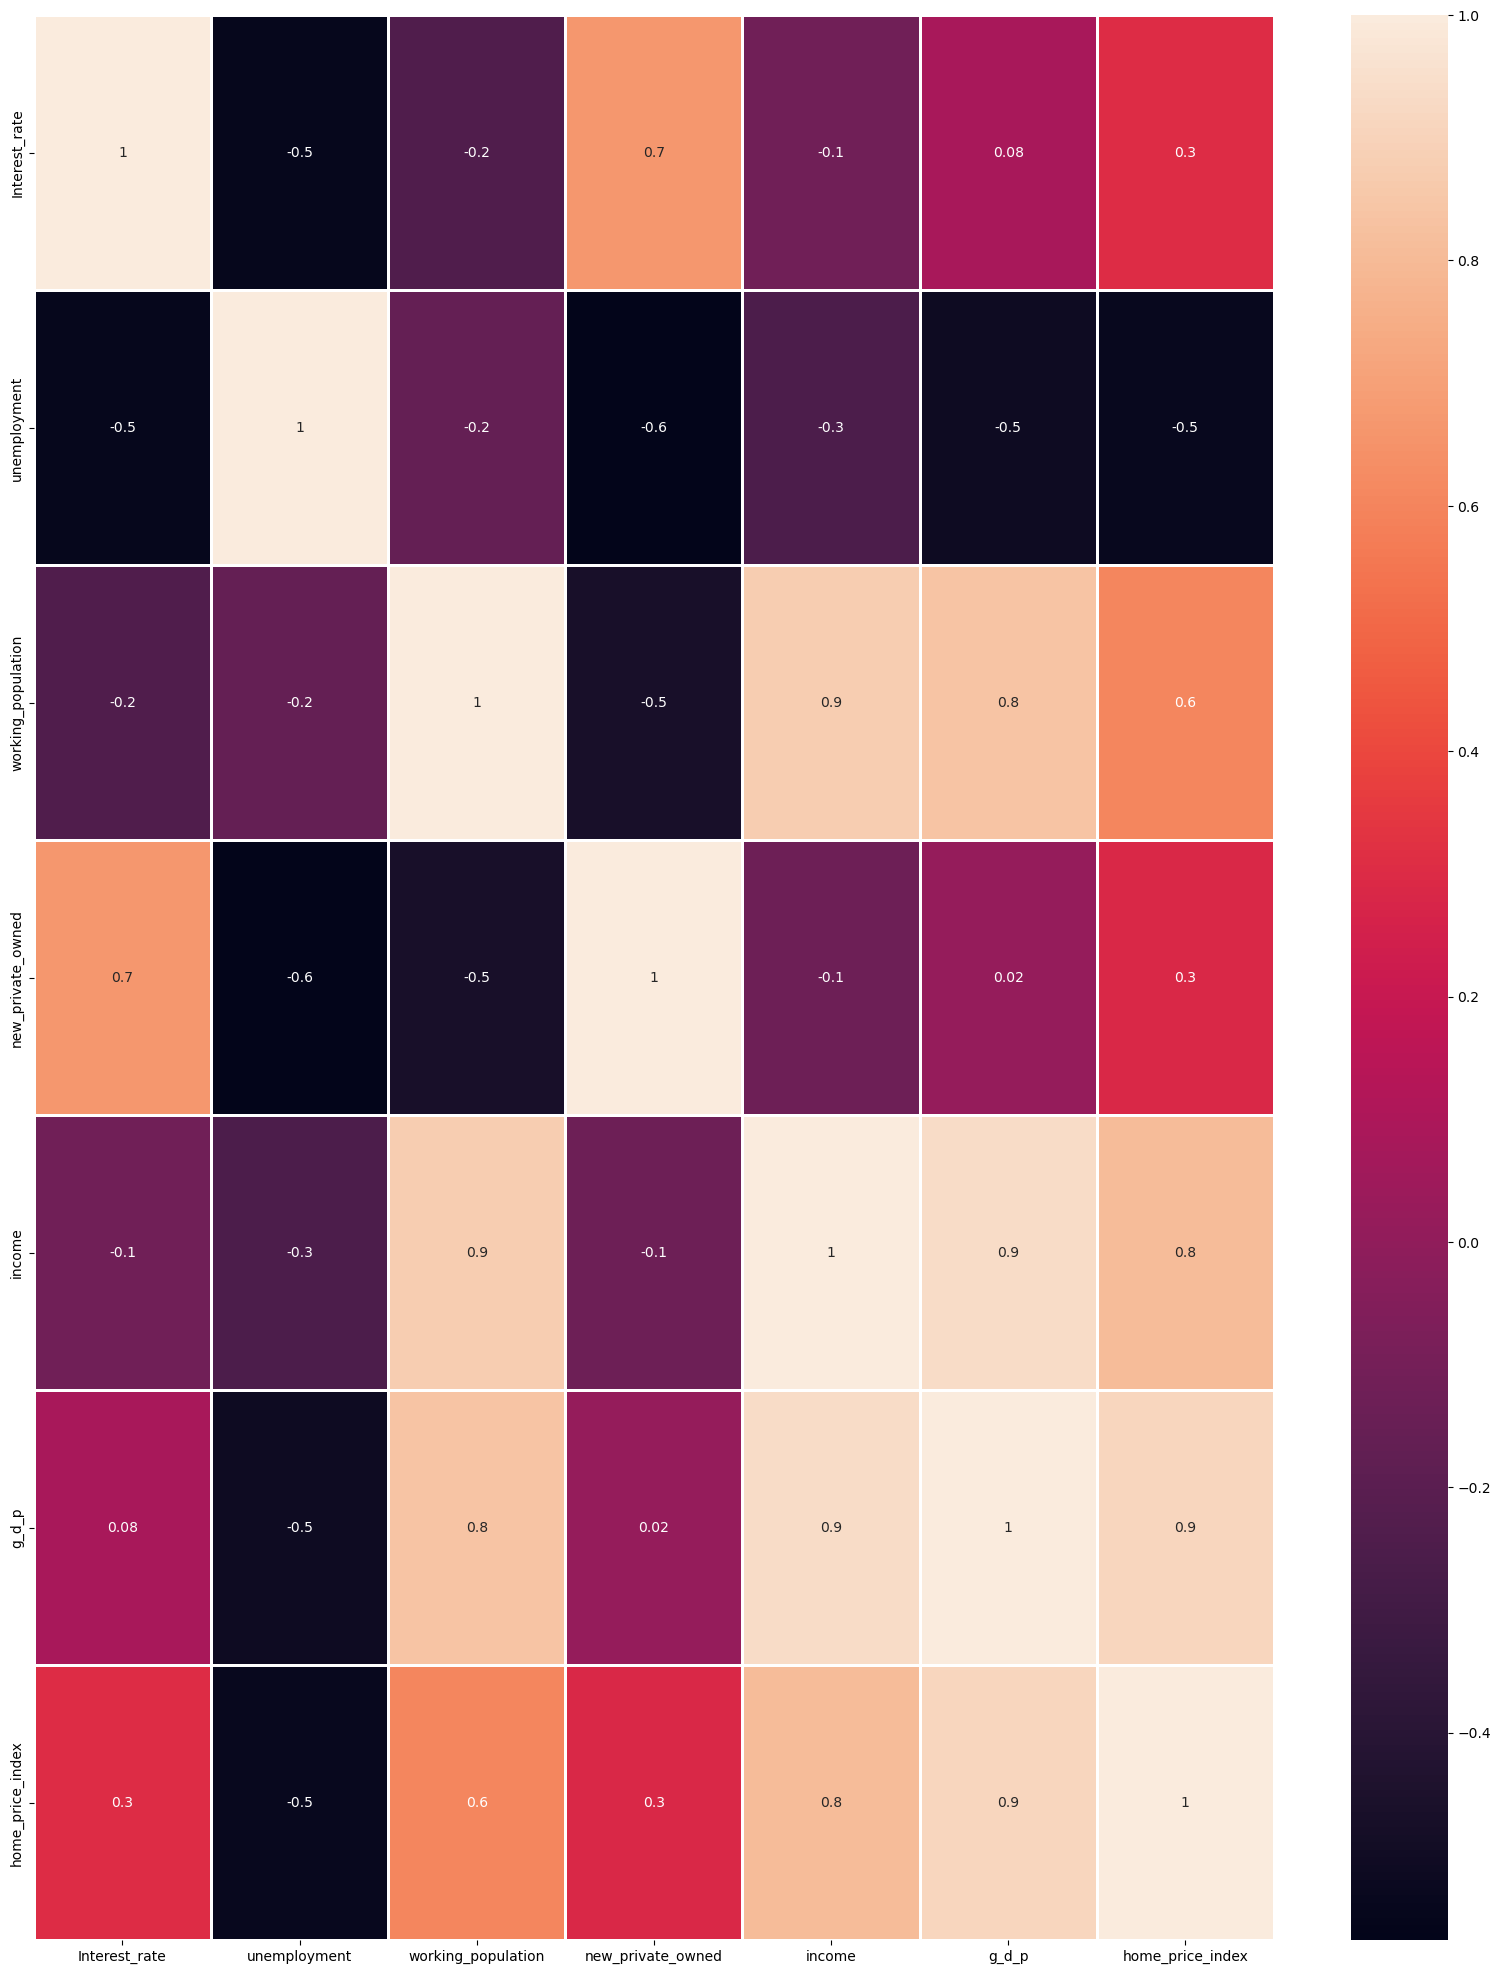

In [254]:
plt.figure(figsize=(20,25))
corr = df.corr()
sns.heatmap(data=corr, annot=True, fmt='.1g' ,linewidth= 2)
plt.show()

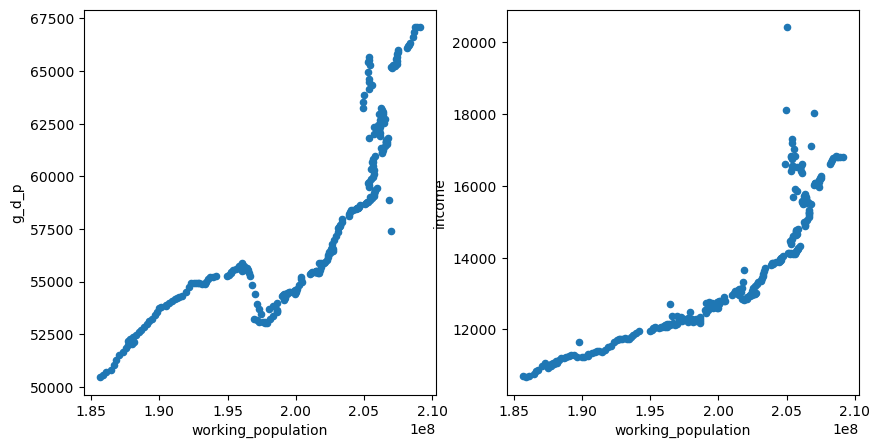

In [255]:
fig ,axs =plt.subplots(1,2)
df.plot(kind='scatter',x='working_population',y='g_d_p', ax=axs[0] ,figsize=(10,5))
df.plot(kind='scatter',x='working_population',y='income', ax=axs[1] ,figsize=(10,5))
fig.savefig('testdata.jpg')

# Checking outliers

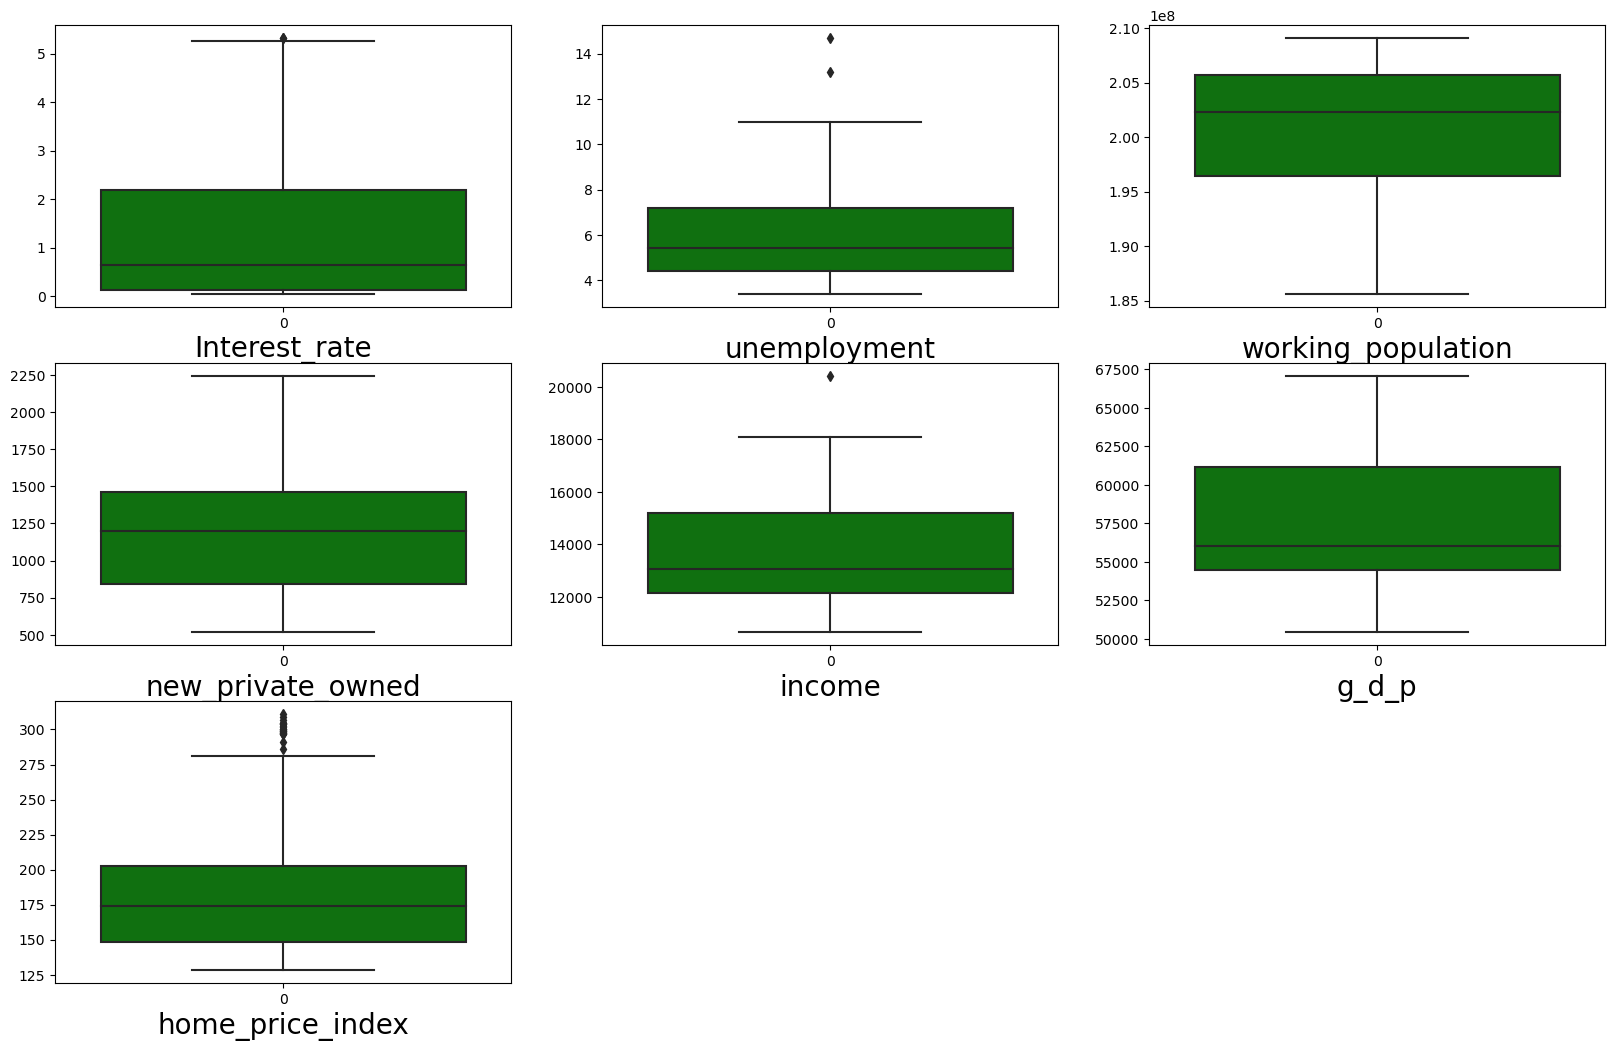

In [256]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=25:
        ax=plt.subplot(7,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Checking Skewness of Features

C:\Users\Lenov\AppData\Local\Temp\ipykernel_13356\1065630129.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\Lenov\AppData\Local\Temp\ipykernel_13356\1065630129.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\Lenov\AppData\Local\Temp\ipykernel_13356\10

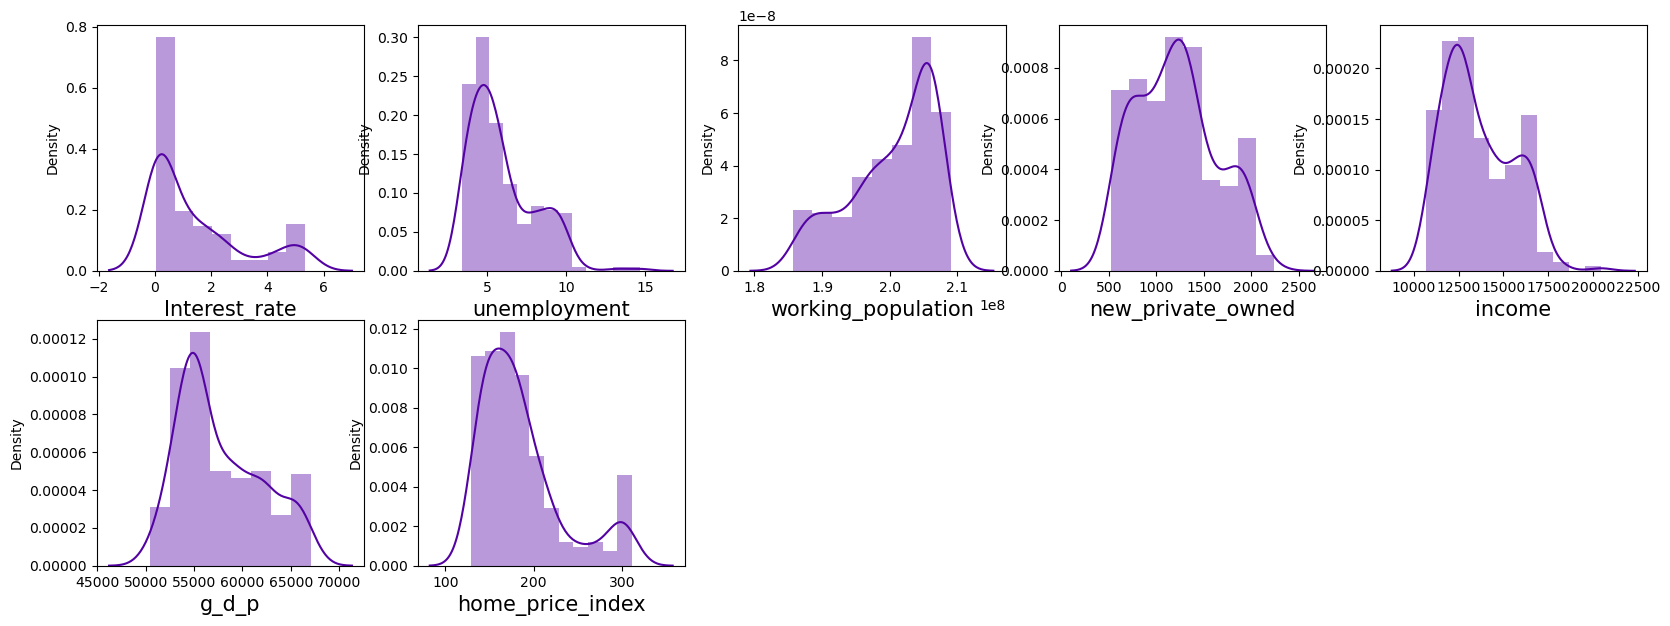

In [257]:
plt.figure(figsize=(20,30),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in df:
    if plotnum<=40:
        plt.subplot(8,5,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=15)
    plotnum+=1
plt.show()

In [258]:
df.skew()

Interest_rate         1.170927
unemployment          1.051399
working_population   -0.745164
new_private_owned     0.302199
income                0.558073
g_d_p                 0.577004
home_price_index      1.311186
dtype: float64

In [260]:
# Making the skew less than or equal to +0.5 and -0.5 for better prediction using yeo-johnson method
skew=['Interest_rate','unemployment','working_population']

# Importing Powertransformer
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

# Transfroming skew data
df[skew] = scaler.fit_transform(df[skew].values)

C:\Users\Lenov\anaconda3\Lib\site-packages\numpy\core\_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [261]:
df.skew()

Interest_rate         0.260915
unemployment          0.089107
working_population   -0.213202
new_private_owned     0.302199
income                0.558073
g_d_p                 0.577004
home_price_index      1.311186
dtype: float64

C:\Users\Lenov\AppData\Local\Temp\ipykernel_13356\1065630129.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\Lenov\AppData\Local\Temp\ipykernel_13356\1065630129.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\Lenov\AppData\Local\Temp\ipykernel_13356\10

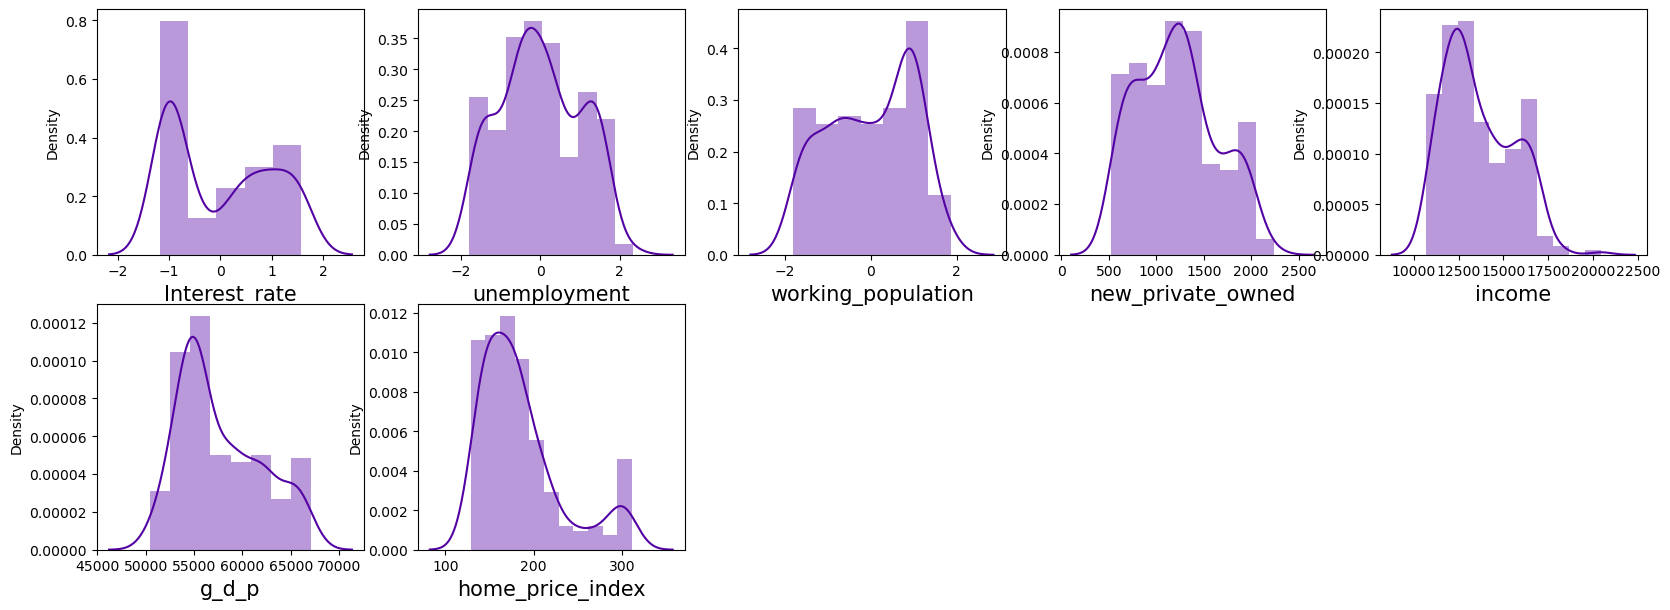

In [262]:
plt.figure(figsize=(20,30),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in df:
    if plotnum<=40:
        plt.subplot(8,5,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=15)
    plotnum+=1
plt.show()

# Train , Test, Split

In [263]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [264]:
X=df.drop(['home_price_index'],axis=1)
Y=df['home_price_index']

In [267]:
Y

DATE
2003-01-01    128.461
2003-02-01    129.355
2003-03-01    130.148
2003-04-01    130.884
2003-05-01    131.735
               ...   
2023-05-01    302.566
2023-06-01    304.593
2023-07-01    306.767
2023-08-01    309.155
2023-09-01    311.175
Name: home_price_index, Length: 249, dtype: float64

In [268]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=99, test_size=.3)
print('Training feature size:',X_train.shape)
print('Training target size:',Y_train.shape)
print('Test feature size:',X_test.shape)
print('Test target size:',Y_test.shape)

Training feature size: (174, 6)
Training target size: (174,)
Test feature size: (75, 6)
Test target size: (75,)


In [271]:
from sklearn.linear_model import LinearRegression
max_r_score=0
r_state=0
for i in range(1,300):
    X_train,X_test,Y_train,Y_test =  train_test_split(X,Y,test_size=.30,random_state=r_state)
    reg=LinearRegression()
    reg.fit( X_train,Y_train)
    y_pred=reg.predict(X_test)
    r2_scr= r2_score(Y_test,y_pred)
    if r2_scr > max_r_score:
        max_r_score=r2_scr
        r_state=i
print("max score",max_r_score,"random state",r_state)  

max score 0.946069492266258 random state 2


# Importing essential libraries

In [272]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
!pip install xgboost
import xgboost as xgb
from xgboost import XGBRegressor

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/bc/43/242432efc3f60052a4a534dc4926b21e236ab4ec8d4920c593da3f65c65d/xgboost-2.0.2-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 228.2 kB/s eta 0:07:17
   ---------------------------------------- 0.1/99.8 MB 228.2 kB/s eta 0:07:17
   ----

# Model Building,Prediction and R2 Score

In [278]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
XT = ExtraTreesRegressor()
adb=AdaBoostRegressor()
xgb=XGBRegressor()
BR = BaggingRegressor()
gradb=GradientBoostingRegressor()
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@')




 Error of  RandomForestRegressor() :
Mean absolute error : 1.8654422666666577
Mean squared error : 9.274939400171911
Root Mean Squared Error: 3.04547851743727


 R2 Score :
0.9962193559225399
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


 Error of  ExtraTreesRegressor() :
Mean absolute error : 1.1905940000000028
Mean squared error : 3.020023313316013
Root Mean Squared Error: 1.7378214273382673


 R2 Score :
0.9987689802854056
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


 Error of  DecisionTreeRegressor() :
Mean absolute error : 3.782333333333331
Mean squared error : 125.46872323999996
Root Mean Squared Error: 11.201282214103882


 R2 Score :
0.948856529950482
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


 Error of  AdaBoostRegressor() :
Mean absolute error : 3.6205489659290357
Mean squared error : 21.14

# Random Forest

RandomForest is a tree based bootstrapping algorithm wherein a certain no. of weak learners (decision trees) are combined to make a powerful prediction model. For every individual learner, a random sample of rows and a few randomly chosen variables are used to build a decision tree model. Final prediction can be a function of all the predictions made by the individual learners. In case of regression problem, the final prediction can be mean of all the predictions

# An extra-trees regressor.

This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

# Decision Tree
Decision tree is a type of supervised learning algorithm(having a pre-defined target variable) that is mostly used in classification problems. In this technique, we split the population or sample into two or more homogeneous sets(or sub-populations) based on most significant splitter / differentiator in input variables.

Decision trees use multiple algorithms to decide to split a node in two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. In other words, we can say that purity of the node increases with respect to the target variable

# AdaBoost
AdaBoost, short for Adaptive Boosting, is an ensemble machine learning algorithm that can be used in a wide variety of classification and regression tasks. It is a supervised learning algorithm that is used to classify data by combining multiple weak or base learners (e.g., decision trees) into a strong learner.

# Analysis For Model Selection
After going through all above models i choose RandomForestRegressor as the best Model for Home Price Prediction For USA, as its error ,R2 squqre value are in fovourable range and also it will not much effected by the problems of Dataset due to its working Methodology. No doubt there are other models that are equally fit as Random Forest but still we have to see future possibilities and Modus Operandy of each model that will be comfortable for problems of future and also must be scalable and efficient to get best and accurate results whatsoever will be the situation
now we will tune the Parameters to get More appropriate results and score.

# Hyper Parameter Tuning : GridSearchCV

In [299]:
from sklearn.model_selection import GridSearchCV
parameter= {'criterion' : ['poisson', 'absolute_error'],
             'max_features':['sqrt', 'log2'],
              'min_samples_split':[3,4],
              'max_depth' : [10,20],
              'n_estimators' : [100,200]
             }

In [300]:
GCV = GridSearchCV(RandomForestRegressor(),parameter,verbose=3,error_score="raise")
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END criterion=poisson, max_depth=10, max_features=sqrt, min_samples_split=3, n_estimators=100;, score=0.996 total time=   0.3s
[CV 2/5] END criterion=poisson, max_depth=10, max_features=sqrt, min_samples_split=3, n_estimators=100;, score=0.993 total time=   0.3s
[CV 3/5] END criterion=poisson, max_depth=10, max_features=sqrt, min_samples_split=3, n_estimators=100;, score=0.995 total time=   0.2s
[CV 4/5] END criterion=poisson, max_depth=10, max_features=sqrt, min_samples_split=3, n_estimators=100;, score=0.964 total time=   0.3s
[CV 5/5] END criterion=poisson, max_depth=10, max_features=sqrt, min_samples_split=3, n_estimators=100;, score=0.995 total time=   0.2s
[CV 1/5] END criterion=poisson, max_depth=10, max_features=sqrt, min_samples_split=3, n_estimators=200;, score=0.995 total time=   0.6s
[CV 2/5] END criterion=poisson, max_depth=10, max_features=sqrt, min_samples_split=3, n_estimators=200;, score=0.994 total

GridSearchCV(error_score='raise', estimator=RandomForestRegressor(),
             param_grid={'criterion': ['poisson', 'absolute_error'],
                         'max_depth': [10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [3, 4],
                         'n_estimators': [100, 200]},
             verbose=3)

# Best Parameters in Tuning

In [301]:
GCV.best_params_

{'criterion': 'absolute_error',
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_split': 3,
 'n_estimators': 100}

# Final Model for Home Price Index

In [303]:
Final_mod = RandomForestRegressor(criterion='absolute_error',n_estimators= 100, max_depth=20 ,
                                 min_samples_split= 3, max_features= 'sqrt')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred))

 R2 Score :
0.9942616142028972


# Save model

In [304]:
import joblib
joblib.dump(Final_mod,'home_price_index.pkl')

['home_price_index.pkl']